In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import OneClassSVM

%matplotlib inline

C:\Users\Shumpu\Anaconda2\envs\p36\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
columns = ["duration", "protocol_type", "service", "flag", "src_bytes", "dst_bytes", "land", "wrong_fragment", "urgent",
        "hot", "num_failed_logins", "logged_in", "num_compromised", "root_shell", "su_attempted", "num_root", 
        "num_file_creations", "num_shells", "num_access_files", "num_outbound_cmds", "is_host_login",
        "is_guest_login", "count", "srv_count", "serror_rate", "srv_serror_rate", "rerror_rate", "srv_rerror_rate",
        "same_srv_rate", "diff_srv_rate", "srv_diff_host_rate", "dst_host_count", "dst_host_srv_count", 
        "dst_host_same_srv_rate", "dst_host_diff_srv_rate", "dst_host_same_src_port_rate", "dst_host_srv_diff_host_rate",
        "dst_host_serror_rate", "dst_host_srv_serror_rate", "dst_host_rerror_rate", "dst_host_srv_rerror_rate", "label"]

df = pd.read_csv("datasets/kdd_cup_1999/kddcup.data/kddcup.data.corrected", sep=",", names=columns, index_col=None)


In [3]:
df.shape

(4898431, 42)

In [4]:
df = df[df["service"] == "http"]
df = df.drop("service", axis=1)
columns.remove("service")

novelties = df[df["label"] != "normal."]
novelties_normal = df[150000:154045]

novelties = pd.concat([novelties, novelties_normal])
normal = df[df["label"] == "normal."]

In [5]:
print(novelties.shape)
print(normal.shape)

(8090, 41)
(619046, 41)


In [6]:
novelties.head(5)

,duration,protocol_type,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
226685,0,tcp,S0,0,0,0,0,0,0,0,...,1,0.00,0.31,0.53,0.00,0.01,1.00,0.52,0.00,portsweep.
226686,0,tcp,S0,0,0,0,0,0,0,0,...,2,0.01,0.31,0.53,0.00,0.02,1.00,0.52,0.00,portsweep.
226687,1,tcp,RSTOS0,1,0,0,0,0,0,0,...,3,0.01,0.31,0.53,0.00,0.02,0.67,0.52,0.33,portsweep.
263531,0,tcp,REJ,0,0,0,0,0,0,0,...,194,0.02,1.00,0.02,0.04,0.00,0.00,0.93,0.01,ipsweep.
263734,0,tcp,REJ,0,0,0,0,0,0,0,...,2,0.02,1.00,0.02,1.00,0.00,0.00,0.92,1.00,ipsweep.


In [7]:
novelties.tail(5)

,duration,protocol_type,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
209742,0,tcp,SF,216,2431,0,0,0,0,0,...,255,1.0,0.0,0.01,0.01,0.0,0.0,0.0,0.0,normal.
209743,0,tcp,SF,218,8746,0,0,0,0,0,...,255,1.0,0.0,0.01,0.01,0.0,0.0,0.0,0.0,normal.
209744,0,tcp,SF,144,9534,0,0,0,0,0,...,255,1.0,0.0,0.01,0.01,0.0,0.0,0.0,0.0,normal.
209745,0,tcp,SF,244,250,0,0,0,0,0,...,255,1.0,0.0,0.01,0.01,0.0,0.0,0.0,0.0,normal.
209746,0,tcp,SF,205,12625,0,0,0,0,0,...,255,1.0,0.0,0.01,0.01,0.0,0.0,0.0,0.0,normal.


In [8]:
for col in normal.columns:
    if normal[col].dtype == "object":
        encoded = LabelEncoder()
        encoded.fit(normal[col])
        normal[col] = encoded.transform(normal[col])
        
for col in novelties.columns:
    if novelties[col].dtype == "object":
        encoded2 = LabelEncoder()
        encoded2.fit(novelties[col])
        novelties[col] = encoded2.transform(novelties[col])

C:\Users\Shumpu\Anaconda2\envs\p36\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [9]:
novelties.head(5)

,duration,protocol_type,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
226685,0,0,3,0,0,0,0,0,0,0,...,1,0.00,0.31,0.53,0.00,0.01,1.00,0.52,0.00,6
226686,0,0,3,0,0,0,0,0,0,0,...,2,0.01,0.31,0.53,0.00,0.02,1.00,0.52,0.00,6
226687,1,0,1,1,0,0,0,0,0,0,...,3,0.01,0.31,0.53,0.00,0.02,0.67,0.52,0.33,6
263531,0,0,0,0,0,0,0,0,0,0,...,194,0.02,1.00,0.02,0.04,0.00,0.00,0.93,0.01,1
263734,0,0,0,0,0,0,0,0,0,0,...,2,0.02,1.00,0.02,1.00,0.00,0.00,0.92,1.00,1


In [10]:
novelties.tail(5)

,duration,protocol_type,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
209742,0,0,6,216,2431,0,0,0,0,0,...,255,1.0,0.0,0.01,0.01,0.0,0.0,0.0,0.0,4
209743,0,0,6,218,8746,0,0,0,0,0,...,255,1.0,0.0,0.01,0.01,0.0,0.0,0.0,0.0,4
209744,0,0,6,144,9534,0,0,0,0,0,...,255,1.0,0.0,0.01,0.01,0.0,0.0,0.0,0.0,4
209745,0,0,6,244,250,0,0,0,0,0,...,255,1.0,0.0,0.01,0.01,0.0,0.0,0.0,0.0,4
209746,0,0,6,205,12625,0,0,0,0,0,...,255,1.0,0.0,0.01,0.01,0.0,0.0,0.0,0.0,4


In [11]:
for f in range(0, 10):
    normal = normal.iloc[np.random.permutation(len(normal))]
    
df2 = pd.concat([normal[:100000],normal[200000:250000]])
df_validate = normal[100000:150000]
x_train, x_test= train_test_split(df2, test_size = 0.2, random_state = 42)
x_val = df_validate

In [12]:
print("Shapes:\nx_train:{}\n" .format(x_train.shape))
print("x_test:{}\n".format (x_test.shape))
print("x_val:{}\n".format (x_val.shape))


Shapes:
x_train:(120000, 41)

x_test:(30000, 41)

x_val:(50000, 41)



In [20]:
ocsvm = OneClassSVM(kernel='rbf', gamma=0.00005, random_state = 42, nu=0.1)

In [21]:
ocsvm.fit(x_train)

OneClassSVM(cache_size=200, coef0=0.0, degree=3, gamma=5e-05, kernel='rbf',
      max_iter=-1, nu=0.1, random_state=42, shrinking=True, tol=0.001,
      verbose=False)

In [22]:
x_test['label'].value_counts()

0    30000
Name: label, dtype: int64

In [33]:

preds = ocsvm.predict(x_test)
score = 0
for f in range(0, x_test.shape[0]):
    if(preds[f] == 1):
        score = score + 1

accuracy = score / x_test.shape[0]
print("Accuracy: {:.2%}".format(accuracy))

Accuracy: 89.09%


In [32]:
print(accuracy)

0.8908666666666667


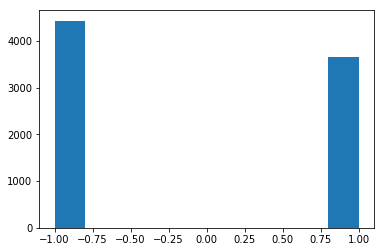

0.4519159456118665


In [24]:
counter = 0
hister = []
for f in range(0, len(matches)):
    if(preds[f] == matches[f]):
        hister.append(1)
        counter = counter+1
    else:
        hister.append(-1)
plt.hist(hister)
plt.show()

print(counter / len(matches))

In [34]:
preds = ocsvm.predict(x_val)
score = 0
for f in range(0, x_val.shape[0]):
    if(preds[f] == 1):
        score = score + 1
        
accuracy = score / x_val.shape[0]
print("Accuracy: {:.2%}".format(accuracy))

Accuracy: 89.49%


In [47]:
from sklearn.metrics import roc_auc_score

preds = ocsvm.predict(novelties)
matches = novelties["label"] == 4

auc = roc_auc_score(preds, matches)
print("AUC: {:.2%}".format (auc))

AUC: 95.83%


In [37]:
matches = []
for f in range(0, novelties.shape[0]):
    if(preds[f] == -1 and novelties.iloc[f]["label"] != 4):
        matches.append(False)
    else:
        matches.append(True)
        
score = 0
for f in range(0, int(novelties.shape[0]/2)):
    if (preds[f] == -1):
        score = score + 1
for f in range(int(novelties.shape[0]/2), novelties.shape[0]):
    if(preds[f] == 1):
        score = score + 1
        
print("Accuracy: {:.2%}".format(score / novelties.shape[0]))

auc = roc_auc_score(preds, matches)
print("AUC: {:.2%}".format (auc))

Accuracy: 95.62%
AUC: 95.83%


In [43]:
y_true = []
for f in range (0, novelties.shape[0]):
    if(novelties.iloc[f]["label"]!= 4):
        y_true.append(False)
    else:
        y_true.append(True)

y_score = []
for f in preds:
    if f == 1:
        y_score.append(True)
    else:
        y_score.append(False)



auc = roc_auc_score(y_true, preds)
print("AUC: {:.2%}".format (auc))

AUC: 95.62%


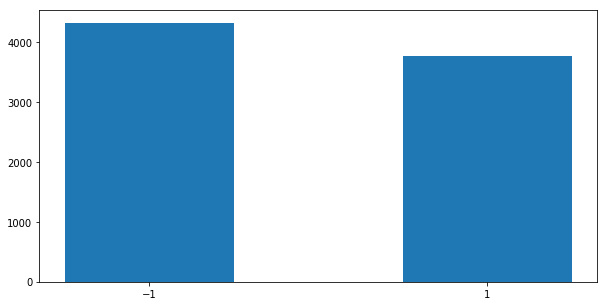

In [48]:
plt.figure(figsize=(10,5))
plt.hist(preds, bins=[-1.5, -0.5] + [0.5, 1.5], align='mid')
plt.xticks([-1, 1])
plt.show()

4005
4045
0.9901112484548825
0.00988875154511748
0.9901112484548825
[0.         0.00988875 1.        ] [nan nan nan] [ 2  1 -1]
Area under the ROC curve : nan


C:\Users\Shumpu\Anaconda2\envs\p36\lib\site-packages\sklearn\metrics\ranking.py:571: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


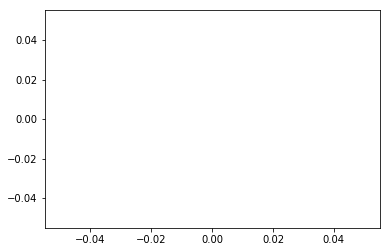

In [92]:
from sklearn.metrics import roc_curve, auc
anom = []
for f in range(0, len(preds)):
    anom.append(False)
count = 0;
for f in range(0, len(preds)):
    if preds[f] == -1:
        count = count+1

print(count)
print(len(preds))
print(count / len(preds))
print( 1 - (count / len(preds)))    
    
recall = count / len(preds)

print(recall)
recall = [recall]

fpr, tpr, thresholds = roc_curve(anom, preds)
print(fpr, tpr, thresholds)
roc_auc = auc(fpr, tpr) # this generates ValueError[1]
print ("Area under the ROC curve : %f" % roc_auc)
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)

In [78]:
for f in range(0, len(anom)):
    print(anom[f], matches[f])

-1 False
-1 False
-1 False
1 True
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 

-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-

-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-

-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-1 False
-

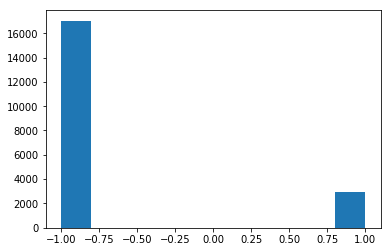

In [47]:
plt.hist(preds)
plt.show()

In [ ]:
anomaly_scores = isolation_forest.decision_function(x_val)
plt.figure(figsize=(15, 10))
plt.hist(anomaly_scores, bins=100)
plt.xlabel('Average Path Lengths', fontsize=14)
plt.ylabel('Number of Data Points', fontsize=14)
plt.show()

In [167]:
from sklearn.metrics import roc_auc_score

anomalies = anomaly_scores > -0.19
matches = y_val == list(encoded.classes_).index("normal.")
auc = roc_auc_score(anomalies, matches)
print("AUC: {:.2%}".format (auc))

AUC: 99.81%


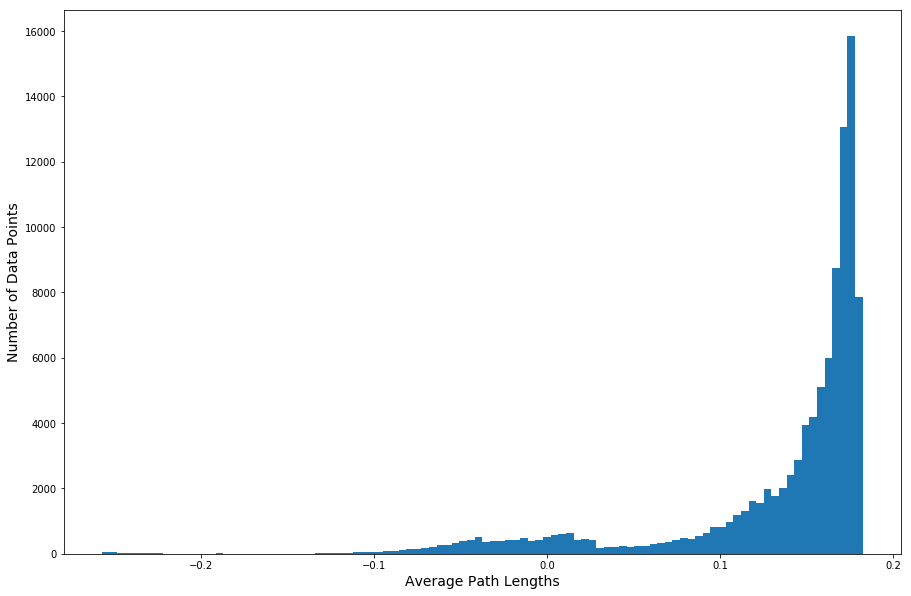

In [162]:
anomaly_scores_test = isolation_forest.decision_function(x_test)
plt.figure(figsize=(15, 10))
plt.hist(anomaly_scores_test, bins=100)
plt.xlabel('Average Path Lengths', fontsize=14)
plt.ylabel('Number of Data Points', fontsize=14)
plt.show()

In [163]:
anomalies_test = anomaly_scores_test > -0.19
matches = y_test == list(encoded.classes_).index("normal.")
auc = roc_auc_score(anomalies_test, matches)
print("AUC: {:.2%}".format (auc))

AUC: 99.82%
